### DBSCAN Algorithm Implementation
1. The assignment targets to implement DBSCAN algorithm to cluster the dataset consisting of datapoints in shapes of circles, blobs and moons to check the cluster quality of DBSCAN algorithm on non-spherical data.
2. Also, it targets to compare the quality of KMeans and Hierarchical clustering algorithms along with DBSCAN clustering algorithm.

In [42]:
# Importing the necessary dependancies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler


In [43]:
# read the csv files
df = []
df.append(pd.read_csv('cluster_blobs.csv'))
df.append(pd.read_csv('cluster_moons.csv'))
df.append(pd.read_csv('cluster_circles.csv'))

Clustering cluster_blobs dataset

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


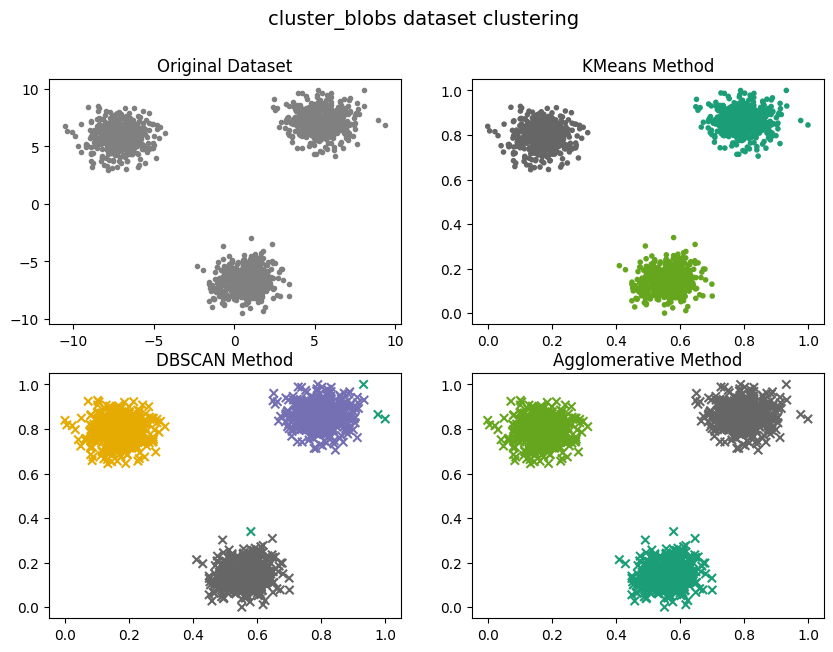

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('cluster_blobs dataset clustering', fontsize=14)

# Plot the original data
ax[0, 0].scatter(df[0]['X1'], df[0]['X2'], marker='.', color='gray')
ax[0, 0].set_title('Original Dataset')

scaler = MinMaxScaler()
scaled_blobs = pd.DataFrame(scaler.fit_transform(df[0]), columns=['X1', 'X2'])

# KMeans clustering
kmeans_blobs = KMeans(3).fit(scaled_blobs)
ax[0, 1].scatter(scaled_blobs['X1'], scaled_blobs['X2'], c=kmeans_blobs.labels_, cmap='Dark2', marker='.')
ax[0, 1].set_title('KMeans Method')

# DBSCAN clustering
dbscan_blobs = DBSCAN(eps=0.05).fit(scaled_blobs)
ax[1, 0].scatter(scaled_blobs['X1'], scaled_blobs['X2'], c=dbscan_blobs.labels_, cmap='Dark2', marker='x')
ax[1, 0].set_title('DBSCAN Method')

# Agglomerative clustering
agglo_blobs = AC(n_clusters=3, linkage='single').fit(scaled_blobs)
ax[1, 1].scatter(scaled_blobs['X1'], scaled_blobs['X2'], c=agglo_blobs.labels_, cmap='Dark2', marker='x')
ax[1, 1].set_title('Agglomerative Method')

plt.show()

In [47]:
# Lets calculate silhouette scores for each clustering method
silhouette_scores = {
    'KMeans': silhouette_score(scaled_blobs, kmeans_blobs.labels_),
    'DBSCAN': silhouette_score(scaled_blobs, dbscan_blobs.labels_),
    'Agglomerative': silhouette_score(scaled_blobs, agglo_blobs.labels_)
}
print('Silhouette score for blobs data is, ')
print(pd.DataFrame([silhouette_scores], index=['blobs']))

Silhouette score for blobs data is, 
         KMeans    DBSCAN  Agglomerative
blobs  0.861753  0.800215       0.861753


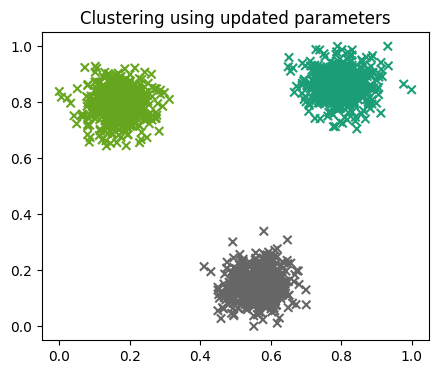

Updated silhouette score: 
         KMeans    DBSCAN  Agglomerative
blobs  0.500322  0.924453       0.394708


In [75]:
# Silhouette score we got for DBSCAN method is low. Lets try to improve it before moving forward.
# Implementing DBSCAN clustering with improved model parameters
dbscan_new = DBSCAN(eps=0.15,min_samples=4)
plt.figure(figsize=(5, 4))
plt.title('Clustering using updated parameters')

dbscan_clusters_new = dbscan_new.fit(scaled_blobs.iloc[:, [0, 1]]).labels_

# Update silhouette scores for the new DBSCAN clusters
silhouette_scores['DBSCAN'] = silhouette_score(scaled_blobs, dbscan_clusters_new)
scaled_blobs['dbscan_new'] = dbscan_clusters_new
plt.scatter(scaled_blobs['X1'], scaled_blobs['X2'], c=scaled_blobs['dbscan_new'], cmap='Dark2', marker='x')
plt.show()

print('Updated silhouette score: ')
print(pd.DataFrame([silhouette_scores], index=['blobs']))

In [50]:
# Silhouette score of DBSCAN method using updated parameters is improved, so we will take epsilon = 0.15 and min_samples = 4 as a reference for clustering next datasets

Clustering cluster_moons dataset

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


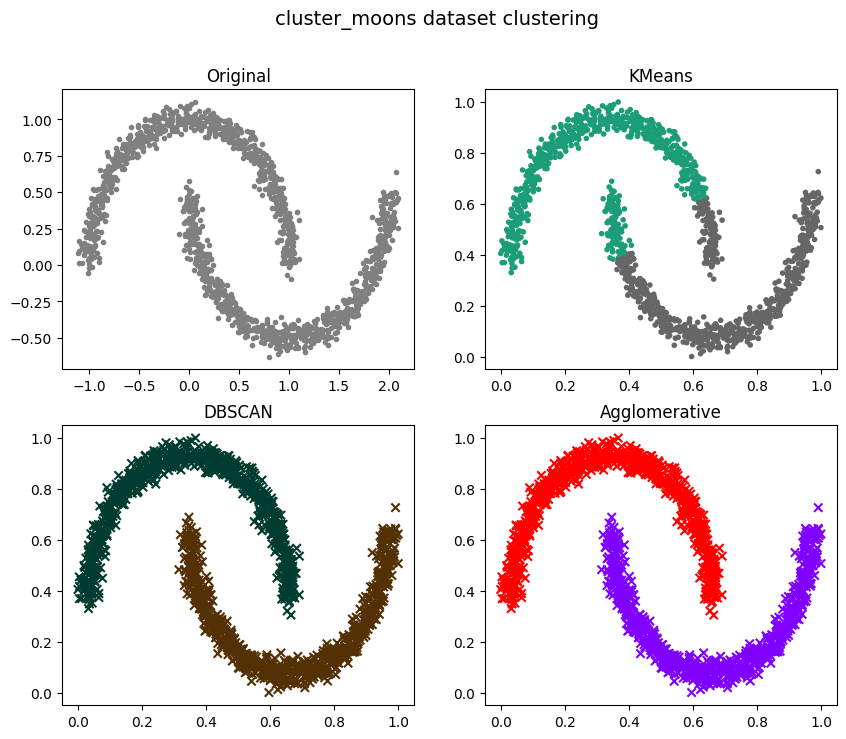

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('cluster_moons dataset clustering', fontsize=14)

ax[0, 0].scatter(df[1]['X_1'], df[1]['X_2'], marker='.', color='gray')
ax[0, 0].set_title('Original')
scaler = MinMaxScaler()
scaled_moons = pd.DataFrame(scaler.fit_transform(df[1]), columns=['X_1', 'X_2'])

# KMeans clustering
kmeans_moons = KMeans(2).fit(scaled_moons)
ax[0, 1].scatter(scaled_moons['X_1'], scaled_moons['X_2'], c=kmeans_moons.labels_, cmap='Dark2', marker='.')
ax[0, 1].set_title('KMeans')

# DBSCAN clustering
dbscan_moons = DBSCAN(eps=0.15,min_samples=4).fit(scaled_moons)
ax[1, 0].scatter(scaled_moons['X_1'], scaled_moons['X_2'], c=dbscan_moons.labels_, cmap='BrBG', marker='x')
ax[1, 0].set_title('DBSCAN')

# Agglomerative clustering
agglo_moons = AC(n_clusters=2, linkage='single').fit(scaled_moons)
ax[1, 1].scatter(scaled_moons['X_1'], scaled_moons['X_2'], c=agglo_moons.labels_, cmap='rainbow', marker='x')
ax[1, 1].set_title('Agglomerative')

plt.show()

In [61]:
# Calculate silhouette scores
silhouette_scores = {
    'KMeans': silhouette_score(scaled_moons, kmeans_moons.labels_),
    'DBSCAN': silhouette_score(scaled_moons, dbscan_moons.labels_),
    'Agglomerative': silhouette_score(scaled_moons, agglo_moons.labels_)
}
print('Silhouette score for moons data is, ')
print(pd.DataFrame([silhouette_scores], index=['moons']))

Silhouette score for moons data is, 
         KMeans    DBSCAN  Agglomerative
moons  0.500322  0.394708       0.394708


Clustering cluster_circles dataset

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


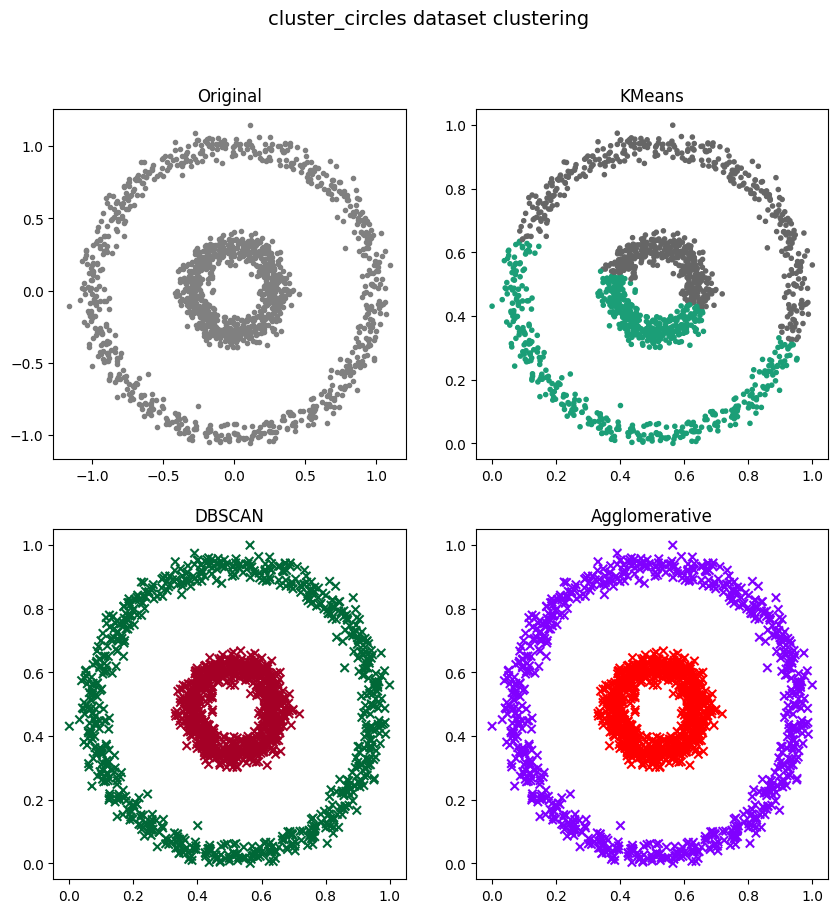

In [70]:
# Create the figure and axis
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('cluster_circles dataset clustering', fontsize=14)

# Plot the original data
ax[0, 0].scatter(df[2]['X1'], df[2]['X2'], marker='.', color='gray')
ax[0, 0].set_title('Original')

# Scale the data
scaler = MinMaxScaler()
scaled_circles = pd.DataFrame(scaler.fit_transform(df[2]), columns=['X1', 'X2'])

# Perform KMeans clustering
kmeans_circles = KMeans(2).fit(scaled_circles)
ax[0, 1].scatter(scaled_circles['X1'], scaled_circles['X2'], c=kmeans_circles.labels_, cmap='Dark2', marker='.')
ax[0, 1].set_title('KMeans')

# Perform DBSCAN clustering
dbscan_circles = DBSCAN(eps=0.15,min_samples=4).fit(scaled_circles)
ax[1, 0].scatter(scaled_circles['X1'], scaled_circles['X2'], c=dbscan_circles.labels_, cmap='RdYlGn', marker='x')
ax[1, 0].set_title('DBSCAN')

# Perform Agglomerative clustering
agglo_circles = AC(n_clusters=2, linkage='single').fit(scaled_circles)
ax[1, 1].scatter(scaled_circles['X1'], scaled_circles['X2'], c=agglo_circles.labels_, cmap='rainbow', marker='x')
ax[1, 1].set_title('Agglomerative')

plt.show()

In [35]:
# Calculate silhouette scores
silhouette_scores = {
    'KMeans': silhouette_score(scaled_circles, kmeans_circles.labels_),
    'DBSCAN': silhouette_score(scaled_circles, dbscan_circles.labels_),
    'Agglomerative': silhouette_score(scaled_circles, agglo_circles.labels_)
}
print('silhouette score for circles data is, ')
print(pd.DataFrame([silhouette_scores], index=['circles']))

silhouette score for circles data is, 
           KMeans    DBSCAN  Agglomerative
circles  0.297732  0.208299       0.208299


In [41]:
# As it can be seen from the plots that DBSCAN clustering method is more effective in clustering non spherical data (circels, moons) and handling outliers as compared KMeans and Hierarchical clustering